### Actividad de perceptrón y perceptrón multicapa
#### Autor: Francisco Serradilla

Tareas:

- Escribir el código de propagación y actualización de pesos del perceptrón.
- Escribir el código de propagación y actualización de pesos del perceptrón multicapa para una capa oculta.
- Probar el correcto funcionamiento con OR y con XOR.
- Probar el correcto funcionamiento para las distribuciones generadas en el notebook. Dibujar los resultados.

Opcional:
- Problema de clasificación de orquídeas.
- Ampliar el código del perceptrón Multicapa para calcular el error de test usando otro conjunto de datos. Este error de test se irá mostrando a la vez que el error de entrenamiento mientras la red se entrena.
- Probar entrenamiento y cálculo del error de test con el juego de datos de aprobados.
- (hacer al menos dos) Probar con problemas adicionales (circulo, fun, morosos, quinielas). Al final hay una explicación de los conjuntos de datos suministrados.
- (opcional) Añadir una segunda capa oculta al perceptrón multacapa y/o un múmero indefinido de capas.

In [3]:
import numpy as np

class Perceptron:
    def __init__(self, ninput, noutput):
        self.ninput = ninput # número de entradas
        self.noutput = noutput # número de salidas
        self.w = np.random.rand(ninput,noutput)-0.5 # pesos
        self.b = np.random.rand(noutput)-0.5 # bias

    def step (self, x): # función de activación
        return np.where(x<0,0,1) 

    def forward (self, x): # propaga un vector x y devuelve la salida
        z = np.dot(x, self.w) + self.b 
        return self.step(z)

    def update (self, x, d, alpha): # realiza una iteración de entrenamiento
        s = self.forward(x) # propaga
        # self.w = self.w + alpha*np.outer(x,d-s) # ajusta pesos
        self.w = self.w + alpha * (x*(d-s)).reshape(self.ninput,self.noutput) # ajusta pesos
        
        self.b = self.b + alpha*(d-s)

    def RMS (self, X, D): # calcula el error RMS
        S = self.forward(X)
        return np.mean(np.sqrt(np.mean(np.square(S-D),axis=1)))

    def accuracy (self, X, D): # calcula el ratio de aciertos
        S = self.forward(X)
        errors = np.mean(np.abs(D-S))
        return 1.0 - errors

    def info (self, X, D): # traza de cómno va el entrenamiento
        print(f'RMS: {self.RMS(X,D):.4f}')
        print(f'Accuracy: {self.accuracy(X,D):.4f}')

    def train (self, X, D, alpha, epochs, trace=0): # entrena usando update
        for e in range(1,epochs+1): # para cada epoch
            for i in range(len(X)): # para cada ejemplo
                self.update(X[i],D[i], alpha)
            if trace!=0 and e%trace == 0: # imprime trazas
                print('\n   Epoch: %d' % e)
                self.info(X,D)

In [4]:
# entrena para la OR

p = Perceptron(ninput=2,noutput=1)

# or
data = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
labels = np.array([[0.0], [1.0], [1.0], [1.0]])

p.train(data, labels, alpha=0.1, epochs=50, trace=10)
p.info(data, labels)


   Epoch: 10
RMS: 0.0000
Accuracy: 1.0000

   Epoch: 20
RMS: 0.0000
Accuracy: 1.0000

   Epoch: 30
RMS: 0.0000
Accuracy: 1.0000

   Epoch: 40
RMS: 0.0000
Accuracy: 1.0000

   Epoch: 50
RMS: 0.0000
Accuracy: 1.0000
RMS: 0.0000
Accuracy: 1.0000


In [5]:
class Multilayer:
    '''
    Clase Multilayer
    Esta clase implementa una red neuronal multicapa desde cero. Permite realizar la propagación hacia adelante, 
    actualizar los pesos mediante el algoritmo de backpropagation, y entrenar la red con un conjunto de datos.
    Atributos:
        layers: Lista de enteros que representan el número de neuronas en cada capa.
        num_layers: Número de capas en la red neuronal.
        weights: Lista de matrices de pesos entre las capas.
        biases (List[np.ndarray]): sesgos para cada capa.
        lRMS (List[float]): valores RMS durante el entrenamiento.
        laaccuracy (List[float]): valores de precisión durante el entrenamiento.
        lRMS_test (List[float]): valores RMS durante los tests.
        laaccuracy_test (List[float]): valores de precisión durante los tests.
    Métodos:
        __init__(self, layers):
            Inicializa la red neuronal con la estructura especificada.
        sigm(self, neta):
            función sigmoide a la entrada.
        forward(self, x):
            propagación hacia adelante con la entrada x.
        update(self, x, d, alpha):
            Actualiza los pesos y sesgos usando el algoritmo de backpropagation.
        RMS(self, X, D):
            Calcula el error RMS entre las salidas esperadas y las obtenidas.
        accuracy(self, X, D):
            Calcula la precisión de la red en los datos proporcionados.
        info(self, X, D, X_test=None, D_test=None):
            Muestra información sobre el desempeño de la red en entrenamiento y pruebas.
        train(self, X, D, alpha, epochs, trace=0, X_test=None, D_test=None):
            Entrena la red neuronal con los datos proporcionados durante un número de épocas.
            '''
    def __init__(self, layers):
        self.layers = layers
        self.num_layers = len(layers)
        
        # Definimos los pesos y sesgos
        self.weights = []
        self.biases = []
        for i in range(self.num_layers - 1):
            self.weights.append(np.random.rand(layers[i], layers[i + 1]) - 0.5)
            self.biases.append(np.random.rand(layers[i + 1]) - 0.5)
        
        self.lRMS = []
        self.laccuracy = []
        self.lRMS_test = []
        self.laccuracy_test = []

    def sigm(self, neta):
        return 1.0 / (1.0 + np.exp(-neta))

    def forward(self, x):
        activations = [x]
        for i in range(self.num_layers - 1):
            neta = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            activations.append(self.sigm(neta))
        return activations[-1]

    def update(self, x, d, alpha):
        activations = [x]
        for i in range(self.num_layers - 1):
            neta = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            activations.append(self.sigm(neta))
        
        # Backpropagation
        deltas = [d - activations[-1]]
        for i in range(self.num_layers - 2, 0, -1):
            deltas.append(np.dot(deltas[-1], self.weights[i].T) * activations[i] * (1 - activations[i]))
        deltas.reverse()
        
        # Update weights and biases
        for i in range(self.num_layers - 1):
            self.weights[i] += alpha * np.outer(activations[i], deltas[i])
            self.biases[i] += alpha * deltas[i]

    def RMS(self, X, D):
        S = self.forward(X)
        return np.mean(np.sqrt(np.mean(np.square(S - D), axis=1)))

    def accuracy(self, X, D):
        S = self.forward(X)
        S = np.round(S)
        errors = np.mean(np.abs(D - S))
        return 1.0 - errors

    def info(self, X, D, X_test=None, D_test=None):
        self.lRMS.append(self.RMS(X, D))
        self.laccuracy.append(self.accuracy(X, D))
        print('     RMS: %6.5f' % self.lRMS[-1])
        print('Accuracy: %6.5f' % self.laccuracy[-1])
        
        if X_test is not None and D_test is not None:
            self.lRMS_test.append(self.RMS(X_test, D_test))
            self.laccuracy_test.append(self.accuracy(X_test, D_test))
            print('     RMS Test: %6.5f' % self.lRMS_test[-1])
            print('Accuracy Test: %6.5f' % self.laccuracy_test[-1])

    def train(self, X, D, alpha, epochs, trace=0, X_test=None, D_test=None):
        self.lRMS = []
        self.laccuracy = []
        self.lRMS_test = []
        self.laccuracy_test = []

        for e in range(1, epochs + 1):
            for i in range(len(X)):
                self.update(X[i], D[i], alpha)
            if trace != 0 and e % trace == 0:
                print('\n   Epoch: %d' % e)
                self.info(X, D, X_test, D_test)
                
def one_hot (d): 
    '''
    Codifica un vector de etiquetas en formato one-hot. 
    Esto facilita el entrenamiento de la red neuronal.
    '''
    num_classes = len(set(d))
    rows = d.shape[0]
    labels = np.zeros((rows, num_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels

In [6]:
# xor
import numpy as np
data = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
labels = np.array([[0.0], [1.0], [1.0], [0.0]])

p = Multilayer([2,2,1])

p.info(data, labels)


     RMS: 0.50015
Accuracy: 0.50000


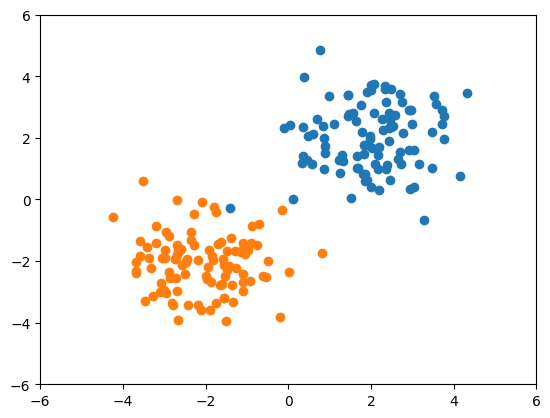

In [27]:
import numpy as np

#ejemplo de clasificación con dos clases
num = 100
x0 = np.random.multivariate_normal([2,2], np.array([[1,0],[0,1]]),num)
d0 = np.repeat(0, num)
x1 = np.random.multivariate_normal([-2,-2], np.array([[1,0],[0,1]]),num)
d1 = np.repeat(1, num)

import matplotlib.pyplot as plt
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.plot(x0[:,0],x0[:,1],'o')
plt.plot(x1[:,0],x1[:,1],'o')

plt.show()
# 
X = np.vstack((x0,x1))
d = np.hstack((d0,d1))
d.shape = (200,1) # convierte el vector en un array

In [28]:
# entrenamiento del perceptrón

p = Perceptron(2,1)
p.train(X, d, 0.01, 10, 1)


   Epoch: 1
RMS: 0.0100
Accuracy: 0.9900

   Epoch: 2
RMS: 0.0100
Accuracy: 0.9900

   Epoch: 3
RMS: 0.0100
Accuracy: 0.9900

   Epoch: 4
RMS: 0.0100
Accuracy: 0.9900

   Epoch: 5
RMS: 0.0100
Accuracy: 0.9900

   Epoch: 6
RMS: 0.0100
Accuracy: 0.9900

   Epoch: 7
RMS: 0.0100
Accuracy: 0.9900

   Epoch: 8
RMS: 0.0100
Accuracy: 0.9900

   Epoch: 9
RMS: 0.0100
Accuracy: 0.9900

   Epoch: 10
RMS: 0.0100
Accuracy: 0.9900


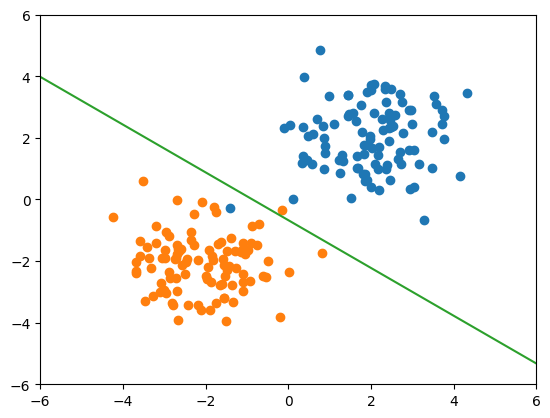

In [29]:
# Dibujar el resultado de la clasificación por el perceptrón
import numpy as np
import matplotlib.pyplot as plt

x_line = np.linspace(-6,6,100)
# Para dibujar la línea de separación despejamos 'y' en la ecuación 'w0*x + w1*y + b = 0'.
y_line = -p.w[0]/p.w[1]*x_line - p.b/p.w[1]
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.plot(x0[:,0],x0[:,1],'o')
plt.plot(x1[:,0],x1[:,1],'o')
plt.plot(x_line, y_line)

plt.show()

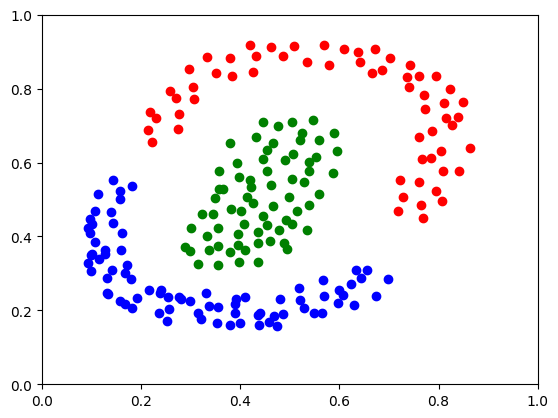

In [30]:
# clasificación en regiones no lineales

X = np.loadtxt('samples/data_3classes_nonlinear_2D.txt')

d = X[:,-1].astype('int')
X = X[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')

plt.show()

no = len(set(d))
ni = X.shape[1]

d = one_hot(d)

In [31]:
import pickle
# entrenar
# encontrar arquitectura mínima que aprende este problema, para data_2classes_nonlinear_2D.txt y para data_3classes_nonlinear_2D.txt
for i in range(1, 10):
    print(i)
    p = Multilayer([ni, i, no])
    p.train(X, d, alpha=0.1, epochs=1000, trace=100)
    if p.accuracy(X, d) == 1:
        print(f'Arquitectura mínima: {i}')
        # Una vez el problema es aprendido, se guarda el modelo usando pickle.
        pickle.dump(p, open(f'./models/data_3classes_nonlinear_2D.pkl', 'wb'))
        break

1

   Epoch: 100
     RMS: 0.33806
Accuracy: 0.69683

   Epoch: 200
     RMS: 0.33080
Accuracy: 0.69683

   Epoch: 300
     RMS: 0.32783
Accuracy: 0.69841

   Epoch: 400
     RMS: 0.32637
Accuracy: 0.69841

   Epoch: 500
     RMS: 0.32550
Accuracy: 0.69841

   Epoch: 600
     RMS: 0.32488
Accuracy: 0.69841

   Epoch: 700
     RMS: 0.32439
Accuracy: 0.69841

   Epoch: 800
     RMS: 0.32397
Accuracy: 0.69841

   Epoch: 900
     RMS: 0.32359
Accuracy: 0.70000

   Epoch: 1000
     RMS: 0.32325
Accuracy: 0.70000
2

   Epoch: 100
     RMS: 0.29882
Accuracy: 0.77619

   Epoch: 200
     RMS: 0.26191
Accuracy: 0.80317

   Epoch: 300
     RMS: 0.25359
Accuracy: 0.81587

   Epoch: 400
     RMS: 0.24987
Accuracy: 0.82063

   Epoch: 500
     RMS: 0.24749
Accuracy: 0.82222

   Epoch: 600
     RMS: 0.24590
Accuracy: 0.82381

   Epoch: 700
     RMS: 0.24498
Accuracy: 0.82540

   Epoch: 800
     RMS: 0.24453
Accuracy: 0.82540

   Epoch: 900
     RMS: 0.24437
Accuracy: 0.82540

   Epoch: 1000
     RMS: 

Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-2.5.1-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
Using cached torch-2.5.1-cp312-cp312-win_amd64.whl (203.0 MB)
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 47.1 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.3
    Uninstalling sympy-1.13.3:
      Successfully uninstalled sympy-1.13.3


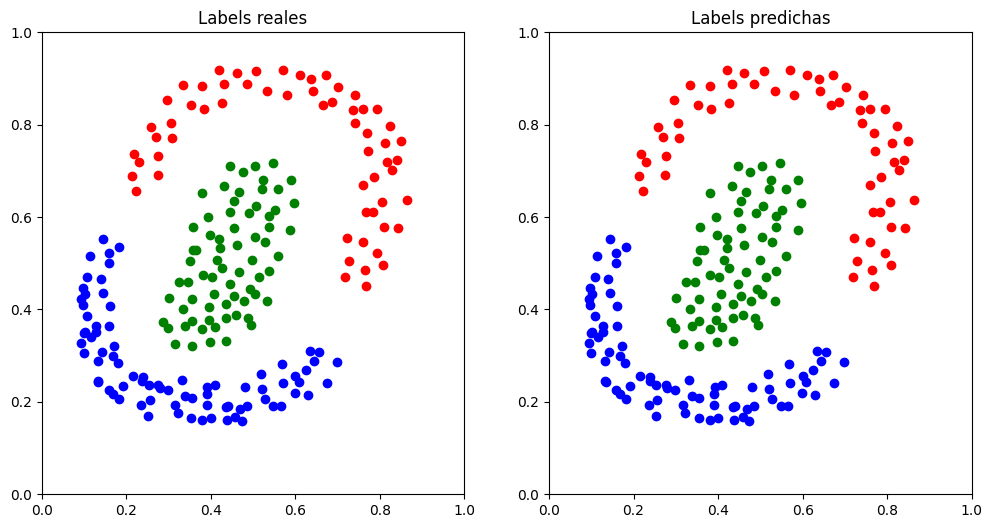

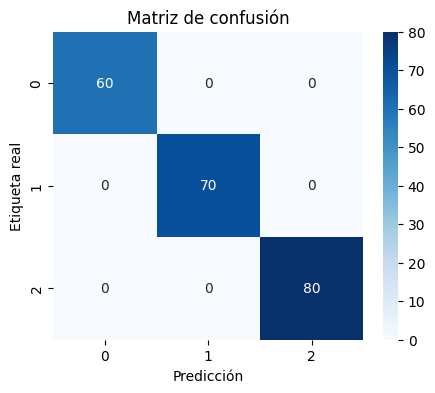

In [33]:
# Cargamos el modelo Multilayer entrenado y nuestros datos X, d
p = pickle.load(open(f'./models/data_3classes_nonlinear_2D.pkl', 'rb'))

# Propagamos las entradas por la red
predictions = p.forward(X)

# Determinamos las etiquetas predichas usando el índice de la neurona con mayor valor
predicted_labels = np.argmax(predictions, axis=1)

# Determinamos las etiquetas reales usando el índice de la neurona que tenga valor 1
true_labels = np.argmax(d, axis=1)

# Creamos la figura para mostrar las etiquetas reales y las predichas
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# En el primer subplot dibujamos las etiquetas reales
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[0].plot(X[true_labels == 0, 0], X[true_labels == 0, 1], 'ro')
axs[0].plot(X[true_labels == 1, 0], X[true_labels == 1, 1], 'go')
axs[0].plot(X[true_labels == 2, 0], X[true_labels == 2, 1], 'bo')
axs[0].set_title('Labels reales')

# En el segundo subplot dibujamos las etiquetas predichas
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[1].plot(X[predicted_labels == 0, 0], X[predicted_labels == 0, 1], 'ro')
axs[1].plot(X[predicted_labels == 1, 0], X[predicted_labels == 1, 1], 'go')
axs[1].plot(X[predicted_labels == 2, 0], X[predicted_labels == 2, 1], 'bo')
axs[1].set_title('Labels predichas')

plt.show()

# Importamos librerías para generar la matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
#  - Filas: etiqueta real
#  - Columnas: etiqueta predicha
cm = confusion_matrix(true_labels, predicted_labels)

# Creamos una nueva figura para la matriz de confusión
plt.figure(figsize=(5,4))
# Usamos un mapa de calor para visualizar cuántos aciertos y errores se dieron
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta real')
plt.show()


<h4><center>Explicación de los resultados en la matriz de confusión: </h4>
A partir de esta matriz vemos que:

Todas las muestras de la clase 0 se han clasificado como 0 (60 de 60).
Todas las muestras de la clase 1 se han clasificado como 1 (70 de 70).
Todas las muestras de la clase 2 se han clasificado como 2 (80 de 80).
En otras palabras, no hay ejemplos mal clasificados, lo que indica que el modelo está acertando al 100% en cada clase, al menos en el conjunto de datos evaluado (o “test”).

En la práctica, esto sugiere que el modelo está aprendiendo muy bien (o el problema era sencillo para la red, o ambas).

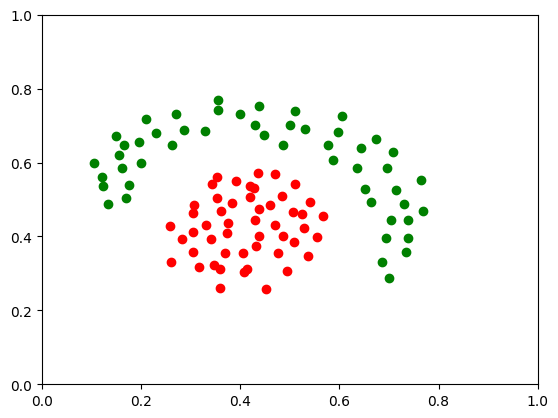

In [14]:
# regiones no lineales

X = np.loadtxt('samples/data_2classes_nonlinear_2D.txt')

d = X[:,-1].astype('int')
X = X[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')

plt.show()

no = len(set(d))
ni = X.shape[1]

d = one_hot(d)

In [ ]:
import pickle
"""
Búsqueda de la arquitectura mínima para una red neuronal multicapa

Este código busca el número mínimo de neuronas necesarias en la capa oculta
para resolver un problema de clasificación. El proceso es:

1. Prueba diferentes tamaños de capa oculta (de 1 a 9 neuronas)
2. Para cada arquitectura:
    - Crea una red con [entradas, neuronas_ocultas, salidas]
    - Entrena la red por 1000 épocas
    - Si alcanza 100% de precisión, guarda el modelo y termina

Variables importantes:
- ni: número de entradas (dimensiones de los datos)
- no: número de salidas (clases)
- i: número de neuronas en la capa oculta (va incrementando)
- alpha: tasa de aprendizaje
- X: datos de entrada
- d: etiquetas objetivo
"""
for i in range(1, 10):
    print(i)
    p = Multilayer([ni, i, no])
    p.train(X, d, alpha=0.1, epochs=1000, trace=100)
    if p.accuracy(X, d) == 1:
        print(f'Arquitectura mínima: {i}')
        pickle.dump(p, open(f'./models/data_2classes_nonlinear_2D.pkl', 'wb'))
        break

1

   Epoch: 100
     RMS: 0.29444
Accuracy: 0.75000

   Epoch: 200
     RMS: 0.26725
Accuracy: 0.78000

   Epoch: 300
     RMS: 0.26088
Accuracy: 0.79000

   Epoch: 400
     RMS: 0.25868
Accuracy: 0.80000

   Epoch: 500
     RMS: 0.25776
Accuracy: 0.79000

   Epoch: 600
     RMS: 0.25732
Accuracy: 0.79000

   Epoch: 700
     RMS: 0.25709
Accuracy: 0.81000

   Epoch: 800
     RMS: 0.25698
Accuracy: 0.81000

   Epoch: 900
     RMS: 0.25693
Accuracy: 0.81000

   Epoch: 1000
     RMS: 0.25692
Accuracy: 0.80000
2

   Epoch: 100
     RMS: 0.28758
Accuracy: 0.75000

   Epoch: 200
     RMS: 0.08306
Accuracy: 0.98000

   Epoch: 300
     RMS: 0.02194
Accuracy: 1.00000

   Epoch: 400
     RMS: 0.01312
Accuracy: 1.00000

   Epoch: 500
     RMS: 0.00941
Accuracy: 1.00000

   Epoch: 600
     RMS: 0.00734
Accuracy: 1.00000

   Epoch: 700
     RMS: 0.00601
Accuracy: 1.00000

   Epoch: 800
     RMS: 0.00509
Accuracy: 1.00000

   Epoch: 900
     RMS: 0.00442
Accuracy: 1.00000

   Epoch: 1000
     RMS: 

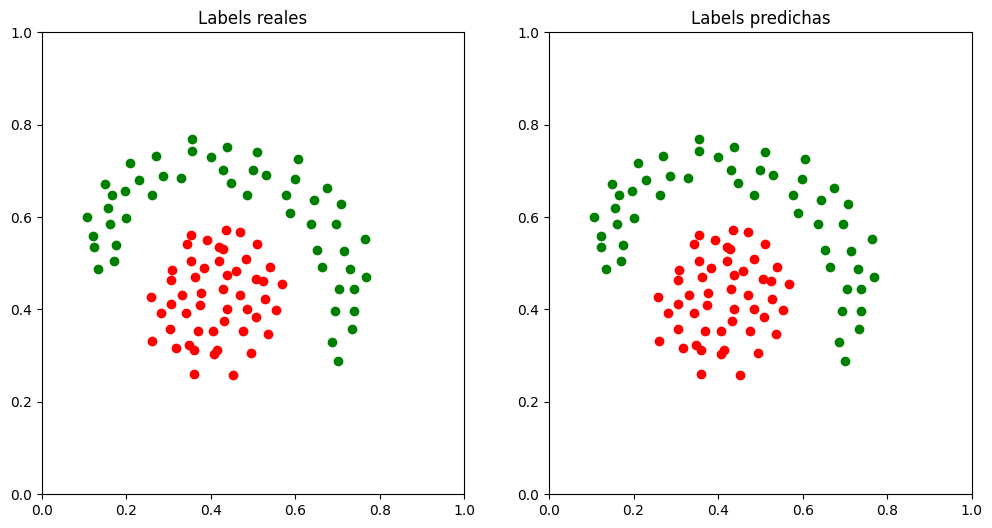

In [ ]:
# Dibujar el resultado de la clasificación por el multicapa, comparar con las salidas que debería dar
p = pickle.load(open(f'./models/data_2classes_nonlinear_2D.pkl', 'rb'))

predictions = p.forward(X)

# print(predictions)
# Clasificar las predicciones cogiendo el índice de la neurona con mayor valor.
predicted_labels = np.argmax(predictions, axis=1)

# Clasificar las salidas reales cogiendo el índice de la neurona con valor 1.
true_labels = np.argmax(d, axis=1)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Mostramos las etiquetas reales
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[0].plot(X[true_labels == 0, 0], X[true_labels == 0, 1], 'ro')
axs[0].plot(X[true_labels == 1, 0], X[true_labels == 1, 1], 'go')
axs[0].plot(X[true_labels == 2, 0], X[true_labels == 2, 1], 'bo')
axs[0].set_title('Labels reales')

# Mostramos las etiquetas predichas
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[1].plot(X[predicted_labels == 0, 0], X[predicted_labels == 0, 1], 'ro')
axs[1].plot(X[predicted_labels == 1, 0], X[predicted_labels == 1, 1], 'go')
axs[1].plot(X[predicted_labels == 2, 0], X[predicted_labels == 2, 1], 'bo')
axs[1].set_title('Labels predichas')

plt.show()

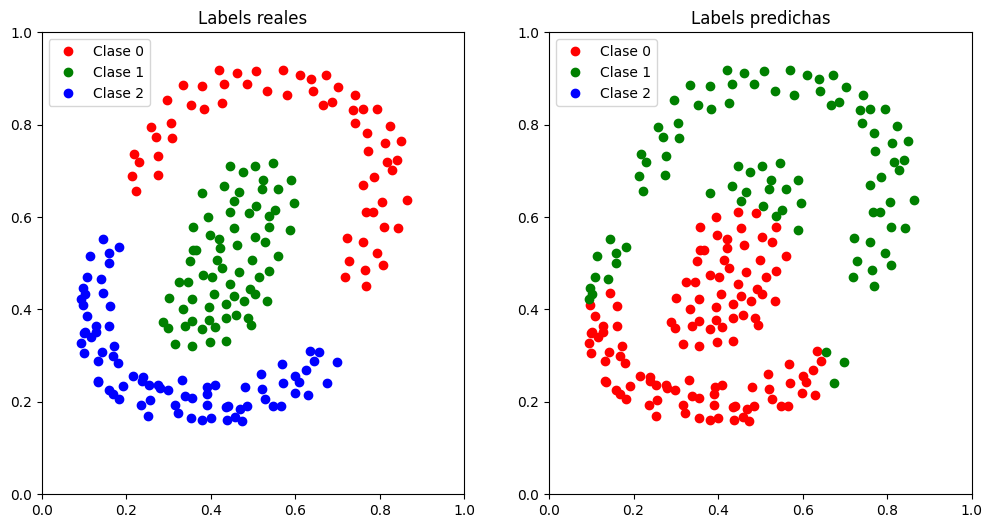

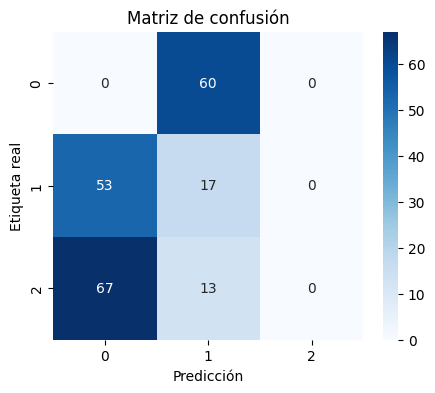

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Cargamos el modelo entrenado y nuestros datos (X, d)
p = pickle.load(open(f'./models/data_2classes_nonlinear_2D.pkl', 'rb'))

# Obtenemos las predicciones del modelo al propagar las entradas
predictions = p.forward(X)

# Determinamos las etiquetas predichas cogiendo el índice de la neurona con mayor salida
predicted_labels = np.argmax(predictions, axis=1)

# Determinamos las etiquetas reales (supuesto one-hot), cogiendo el índice donde vale 1
true_labels = np.argmax(d, axis=1)

# Creamos la figura para mostrar las etiquetas reales vs. predichas
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Mostramos las etiquetas reales
# (comentario breve: 'set_xlim' y 'set_ylim' fijan el rango de ejes en el [0,1])
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[0].plot(X[true_labels == 0, 0], X[true_labels == 0, 1], 'ro', label='Clase 0')
axs[0].plot(X[true_labels == 1, 0], X[true_labels == 1, 1], 'go', label='Clase 1')
axs[0].plot(X[true_labels == 2, 0], X[true_labels == 2, 1], 'bo', label='Clase 2')
axs[0].set_title('Labels reales')
axs[0].legend()

# Mostramos las etiquetas predichas
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[1].plot(X[predicted_labels == 0, 0], X[predicted_labels == 0, 1], 'ro', label='Clase 0')
axs[1].plot(X[predicted_labels == 1, 0], X[predicted_labels == 1, 1], 'go', label='Clase 1')
axs[1].plot(X[predicted_labels == 2, 0], X[predicted_labels == 2, 1], 'bo', label='Clase 2')
axs[1].set_title('Labels predichas')
axs[1].legend()

plt.show()

# Crear y mostrar la matriz de confusión
# (comentario breve: la diagonal nos indica los aciertos)
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta real')
plt.show()


## Problema de clasificacíon de orquídeas.

In [17]:
# Orquideas

X = np.loadtxt('samples/iris.csv', dtype = 'float64', usecols = [0,1,2,3])
L = np.loadtxt('samples/iris.csv', dtype = str, usecols = [4]) 

# convierte la salida a enteros
d = []
options = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for e in L:
    d.append(options.index(e))

d = np.array(d)
X = np.array(X)

d = one_hot(d)

ni = X.shape[1]
no = len(options)

# encontrar arquitectura mínima que aprende este problema
import pickle
# entrenar
# encontrar arquitectura mínima que aprende este problema, para data_2classes_nonlinear_2D.txt y para data_3classes_nonlinear_2D.txt
for i in range(1, 10):
    print(i)
    p = Multilayer([ni, i, no])
    p.train(X, d, alpha=0.05, epochs=5000, trace=100)
    if p.accuracy(X, d) >= 0.99:
        print(f'Arquitectura mínima: {i}')
        pickle.dump(p, open(f'./models/iris.pkl', 'wb'))
        break

1

   Epoch: 100
     RMS: 0.42434
Accuracy: 0.56000

   Epoch: 200
     RMS: 0.31805
Accuracy: 0.72222

   Epoch: 300
     RMS: 0.31080
Accuracy: 0.73111

   Epoch: 400
     RMS: 0.29585
Accuracy: 0.75111

   Epoch: 500
     RMS: 0.29909
Accuracy: 0.74889

   Epoch: 600
     RMS: 0.30491
Accuracy: 0.74444

   Epoch: 700
     RMS: 0.29346
Accuracy: 0.75556

   Epoch: 800
     RMS: 0.29423
Accuracy: 0.75556

   Epoch: 900
     RMS: 0.29203
Accuracy: 0.75778

   Epoch: 1000
     RMS: 0.29041
Accuracy: 0.76000

   Epoch: 1100
     RMS: 0.29000
Accuracy: 0.76000

   Epoch: 1200
     RMS: 0.29367
Accuracy: 0.75778

   Epoch: 1300
     RMS: 0.29189
Accuracy: 0.76222

   Epoch: 1400
     RMS: 0.29157
Accuracy: 0.76222

   Epoch: 1500
     RMS: 0.29451
Accuracy: 0.76222

   Epoch: 1600
     RMS: 0.29981
Accuracy: 0.76000

   Epoch: 1700
     RMS: 0.30133
Accuracy: 0.75556

   Epoch: 1800
     RMS: 0.30201
Accuracy: 0.75556

   Epoch: 1900
     RMS: 0.30156
Accuracy: 0.75556

   Epoch: 2000
   

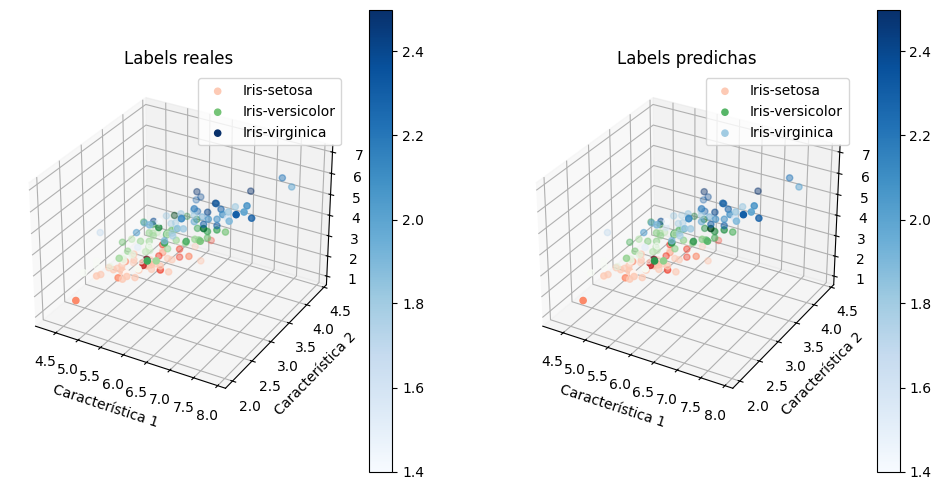

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Dibujar el resultado de la clasificación por el multicapa, comparar con las salidas que debería dar
p = pickle.load(open(f'./models/iris.pkl', 'rb'))
# Propagar las entradas
predictions = p.forward(X)

# Clasificar las predicciones cogiendo el índice de la neurona con mayor valor.
predicted_labels = np.argmax(predictions, axis=1)

# Clasificar las salidas reales cogiendo el índice de la neurona con valor 1.
true_labels = np.argmax(d, axis=1)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')

# Plot the true labels
sc = ax.scatter(X[true_labels == 0, 0], X[true_labels == 0, 1], X[true_labels == 0, 2], c=X[true_labels == 0, 3], cmap='Reds', label='Iris-setosa')
sc = ax.scatter(X[true_labels == 1, 0], X[true_labels == 1, 1], X[true_labels == 1, 2], c=X[true_labels == 1, 3], cmap='Greens', label='Iris-versicolor')
sc = ax.scatter(X[true_labels == 2, 0], X[true_labels == 2, 1], X[true_labels == 2, 2], c=X[true_labels == 2, 3], cmap='Blues', label='Iris-virginica')

ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
ax.set_title('Labels reales')
ax.legend()

plt.colorbar(sc)

ax = fig.add_subplot(122, projection='3d')

# Plot the predicted labels
sc = ax.scatter(X[predicted_labels == 0, 0], X[predicted_labels == 0, 1], X[predicted_labels == 0, 2], c=X[predicted_labels == 0, 3], cmap='Reds', label='Iris-setosa')
sc = ax.scatter(X[predicted_labels == 1, 0], X[predicted_labels == 1, 1], X[predicted_labels == 1, 2], c=X[predicted_labels == 1, 3], cmap='Greens', label='Iris-versicolor')
sc = ax.scatter(X[predicted_labels == 2, 0], X[predicted_labels == 2, 1], X[predicted_labels == 2, 2], c=X[predicted_labels == 2, 3], cmap='Blues', label='Iris-virginica')

ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
ax.set_title('Labels predichas')
ax.legend()

plt.colorbar(sc)
plt.show()


### Explicación de los archivos de datos suministrados

**Nota**: en caso de que se suministre archivo xxx-trn.txt y xxx-tst.txt, se deberá entrenar con el trn y calcular luego el error de test con el tst. Lógicamente queremos un modelo cuyo error de test sea lo más bajo posible. Si no se suministra archivo de test no es necesario dividir en entrenamiento y test, y lo que se busca es el error más bajo en entrenamiento.

#### Aprobados

Contiene 3 entradas, correspondiente a la nota en 3 ejercicios, y 1 salida, que indica si el alumno aprobó o no. Se trataría de predecir si un alumno va a aprobar a partir de sus notas. Es un problema de clasificación.

Cuestiones: ¿Es un problema lineal? ¿Puede aprenderla una red de neuronas?
<li>Parece un problema en el que simplemente habria que calcular los porcentajes a que equivale cada una de las notas sobre la media que es el aprobado o no, una red de neuronas tendría que ajustar los pesos que correspondería a esos porcentajes.</li>

#### Fun

Contiene 1 entrada y 1 salida, que son la *x* y la *y* de una función desconocida. Es un problema de ajuste o regresión.

Cuestiones: ¿Es una función lineal? ¿Puede aprenderla una red de neuronas? ¿Puede decirnos la red qué función es?

#### Morosos

Contiene datos de morosidad de un banco. La idea es predecir si un nuevo cliente va a devolver un prestamo o no y utilizar esta predicción para concederle o denegarle el préstamo. Es un problema de clasificación.

Tiene 9 entradas y 1 salida.

Cuestiones: ¿Es una función lineal? ¿Cuál es el porcentaje de acierto estimado en test?

#### Quinielas

Contiene datos de quinielas deportivas. Tiene 60 entradas y 3 salidas (1, X, 2). Es un problema de clasificación.

Cuestiones: ¿Cuál es el porcentaje de acierto estimado en test?

#### Sensores

Contiene datos de sensores y velocidades medias en la M-40. La idea es ver si se puede predecir la velocidad media en un punto que no tiene sensor a partir de las lecturas de los sensores en otros puntos. Es un problema de ajuste o regresión.

Cuestiones: ¿Cuál es el porcentaje de acierto estimado en test?

#### Circulo

Es un problema de clasificación con 3 regiones concéntricas. No tiene conjunto de test, el objetivo es encontrar la red mínima que pueda clasificar correctamente todos los ejemplos.

#### Encoder

Es el problema clásico de utilizar una capa oculta para codificar patrones de 8 valores en una dimensión menor. El objetivo es entrenar un perceptrón 8-3-8 para que aprenda esta codificación en el 100% de los ejemplos.  Es un problema de clasificación.

#### Pima-diabetes

Contiene resultados de un conjunto de análisis y pruebas en personas que posteriormente desarrollaron o no diabetes. La idea es ver si se puede predecir si una persona va a desarrollar la enfermedad en el futuro.

En este caso hay que separar aleatoriamente un 30% de ejemplos para tener una conjunto de test. Nota: se sugiere usar la función shuffle.

Cuestiones: ¿Cuál es el porcentaje de acierto estimado en test?

## Datos aprobados

In [19]:
# Cargar datos de entrenamiento y test desde archivos
data_train = np.loadtxt('./samples/aprobado-ent.txt')
data_test = np.loadtxt('./samples/aprobado-tst.txt')

# Separar características y etiquetas
X_train = data_train[:, :-1]
y_train = data_train[:, -1].reshape(-1, 1)
X_test = data_test[:, :-1]
y_test = data_test[:, -1].reshape(-1, 1)

# Entrenar el modelo con los datos de aprobados
p = Multilayer([3,5,1]) 
p.train(X_train, y_train, alpha=0.05, epochs=1500, trace=100, X_test=X_test, D_test=y_test)


   Epoch: 100
     RMS: 0.08698
Accuracy: 0.97959
     RMS Test: 0.17792
Accuracy Test: 0.87755

   Epoch: 200
     RMS: 0.04342
Accuracy: 0.97959
     RMS Test: 0.12002
Accuracy Test: 0.89796

   Epoch: 300
     RMS: 0.05169
Accuracy: 0.95918
     RMS Test: 0.13506
Accuracy Test: 0.87755

   Epoch: 400
     RMS: 0.04659
Accuracy: 0.97959
     RMS Test: 0.09679
Accuracy Test: 0.89796

   Epoch: 500
     RMS: 0.05299
Accuracy: 0.95918
     RMS Test: 0.10232
Accuracy Test: 0.87755

   Epoch: 600
     RMS: 0.05295
Accuracy: 0.97959
     RMS Test: 0.10213
Accuracy Test: 0.87755

   Epoch: 700
     RMS: 0.04678
Accuracy: 0.97959
     RMS Test: 0.09674
Accuracy Test: 0.89796

   Epoch: 800
     RMS: 0.01884
Accuracy: 1.00000
     RMS Test: 0.06907
Accuracy Test: 0.93878

   Epoch: 900
     RMS: 0.00886
Accuracy: 1.00000
     RMS Test: 0.05607
Accuracy Test: 0.93878

   Epoch: 1000
     RMS: 0.00264
Accuracy: 1.00000
     RMS Test: 0.03749
Accuracy Test: 0.97959

   Epoch: 1100
     RMS: 0.0

## Función

In [20]:
import numpy as np
# Cargar datos de entrenamiento y test desde archivos
data_train = np.loadtxt('./samples/fun-trn.txt')
data_test = np.loadtxt('./samples/fun-tst.txt')

# Separar características y etiquetas
X_train = data_train[:, :-1]
y_train = data_train[:, -1].reshape(-1, 1)
X_test = data_test[:, :-1]
y_test = data_test[:, -1].reshape(-1, 1)

# Entrenar el modelo
p = Multilayer([1, 4, 6, 1])
p.train(X_train, y_train, alpha=0.1, epochs=5000, trace=100, X_test=X_test, D_test=y_test)


   Epoch: 100
     RMS: 0.13241
Accuracy: 0.80576
     RMS Test: 0.12863
Accuracy Test: 0.80841

   Epoch: 200
     RMS: 0.10239
Accuracy: 0.81170
     RMS Test: 0.09855
Accuracy Test: 0.81599

   Epoch: 300
     RMS: 0.07634
Accuracy: 0.81170
     RMS Test: 0.07431
Accuracy Test: 0.81744

   Epoch: 400
     RMS: 0.07807
Accuracy: 0.81170
     RMS Test: 0.07733
Accuracy Test: 0.81599

   Epoch: 500
     RMS: 0.07890
Accuracy: 0.81235
     RMS Test: 0.07939
Accuracy Test: 0.81744

   Epoch: 600
     RMS: 0.06448
Accuracy: 0.81262
     RMS Test: 0.06527
Accuracy Test: 0.81731

   Epoch: 700
     RMS: 0.05494
Accuracy: 0.81170
     RMS Test: 0.05573
Accuracy Test: 0.81731

   Epoch: 800
     RMS: 0.04906
Accuracy: 0.81170
     RMS Test: 0.04981
Accuracy Test: 0.81559

   Epoch: 900
     RMS: 0.04501
Accuracy: 0.81170
     RMS Test: 0.04538
Accuracy Test: 0.81559

   Epoch: 1000
     RMS: 0.04211
Accuracy: 0.80924
     RMS Test: 0.04236
Accuracy Test: 0.81559

   Epoch: 1100
     RMS: 0.0

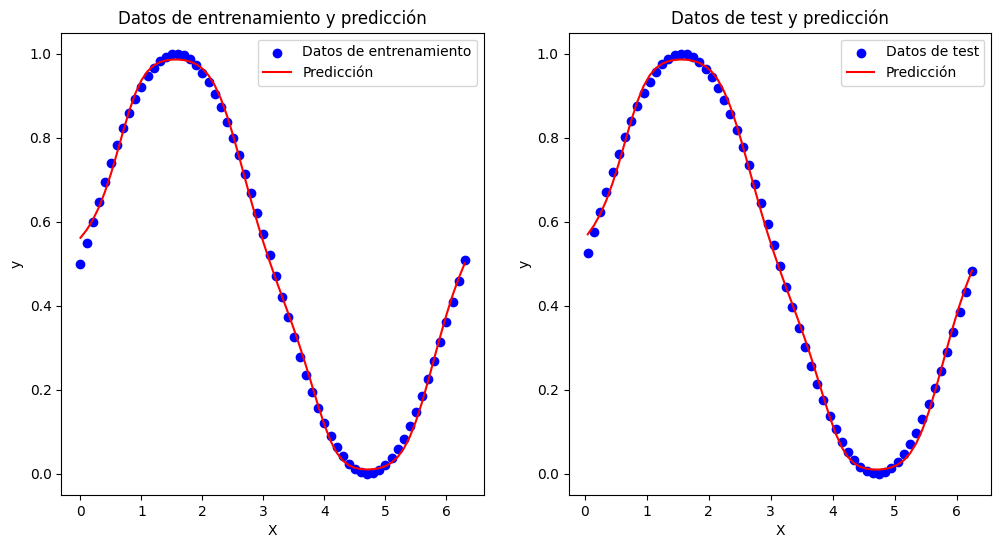

In [21]:

# Predicciones
y_pred_train = p.forward(X_train)
y_pred_test = p.forward(X_test)

# Graficar la función original y la predicción
plt.figure(figsize=(12, 6))

# Datos de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.plot(X_train, y_pred_train, color='red', label='Predicción')
plt.title('Datos de entrenamiento y predicción')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Datos de test
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Datos de test')
plt.plot(X_test, y_pred_test, color='red', label='Predicción')
plt.title('Datos de test y predicción')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.show()

In [22]:
import numpy as np

# Cargar datos de entrenamiento y test desde archivos
data_train = np.loadtxt('./samples/morosos-ent.txt')
data_test = np.loadtxt('./samples/morosos-tst.txt')

# Separar características y etiquetas
X_train = data_train[:, :-1]
y_train = data_train[:, -1].reshape(-1, 1)
X_test = data_test[:, :-1]
y_test = data_test[:, -1].reshape(-1, 1)

# Entrenar el modelo
p = Multilayer([9, 20, 10, 1])
p.train(X_train, y_train, alpha=0.1, epochs=1000, trace=100, X_test=X_test, D_test=y_test)


   Epoch: 100
     RMS: 0.23891
Accuracy: 0.83446
     RMS Test: 0.30602
Accuracy Test: 0.75146

   Epoch: 200
     RMS: 0.19096
Accuracy: 0.88060
     RMS Test: 0.30237
Accuracy Test: 0.76023

   Epoch: 300
     RMS: 0.13459
Accuracy: 0.90773
     RMS Test: 0.28793
Accuracy Test: 0.73977

   Epoch: 400
     RMS: 0.09322
Accuracy: 0.93487
     RMS Test: 0.26720
Accuracy Test: 0.75439

   Epoch: 500
     RMS: 0.10686
Accuracy: 0.91995
     RMS Test: 0.28316
Accuracy Test: 0.73099

   Epoch: 600
     RMS: 0.05673
Accuracy: 0.95929
     RMS Test: 0.28331
Accuracy Test: 0.71930

   Epoch: 700
     RMS: 0.05995
Accuracy: 0.95658
     RMS Test: 0.28824
Accuracy Test: 0.71053

   Epoch: 800
     RMS: 0.05279
Accuracy: 0.96472
     RMS Test: 0.27682
Accuracy Test: 0.73977

   Epoch: 900
     RMS: 0.04939
Accuracy: 0.96336
     RMS Test: 0.27255
Accuracy Test: 0.74561

   Epoch: 1000
     RMS: 0.04101
Accuracy: 0.97422
     RMS Test: 0.28957
Accuracy Test: 0.71345


Vemos que va mucho mejor con tan solo 100 epochs para el test, ya que así no tiene overfitting. Ponemos 100 epochs.

In [23]:
p = Multilayer([9, 20, 10, 1])
p.train(X_train, y_train, alpha=0.1, epochs=100, trace=100, X_test=X_test, D_test=y_test)


   Epoch: 100
     RMS: 0.23358
Accuracy: 0.84803
     RMS Test: 0.32560
Accuracy Test: 0.71053


### Introducción a pytorch

Características:
  * Creado por FaceBook en 2017 fusionando las librerías torch y caffe.
  * Es de código abierto.
  * Incluye computación basada en tensores (similar a numpy) y con soporte de GPU, incluidas NVidia, AMD y Apple silicon.
  * Incluye componentes para Redes de Neuronas y Deep Learning, tanto secuenciales como funcionales.

Ventajas frente a tensorflow
 * Mayor comunidad; se adapta más rápido a las nuevas versiones de python.
 * No propietario, fuentes disponibles.
 * Soporte a GPU en AMD y Mac Silicon.
 * La documentación es MUY buena.
 * Es más claro el proceso de enviar y recibir objetos a la GPU.
 * Es más eficiente para el aprendizaje por refuerzo.
 * Ligeramente de más alto nivel que tensorflow, pero por debajo de keras.

Desventajas
  * No es de tan alto nivel como Keras:
    * Requiere la implementación del bucle train.
    * Requiere especificar en más detalle la arquitectura secuencial.
    * Requiere calcular dentro del train las métricas de validación.
    * Requiere mover expresamente los objetos a la GPU.
    * Requiere retropropagar expresamente.
    * Requiere indicar expresamente cuáles son los tensores sobre los que aplicar descenso del gradiente.
 
 Descarga y documentación.  
 https://pytorch.org
 
#### Módulos relacionados

  * torchvision: añade recursos para tratamiento de imágenes, incluyendo modelos preentrenados.
  * torchtext: ídem para lenguaje natural.
  * torchaudio: ídem para audio.

#### Enlaces:

  * Tutorial oficial: https://pytorch.org/tutorials/beginner/basics/intro.html
  * Tutorial en youtube: https://www.youtube.com/watch?v=QetoD5LXlEg
  

### Capas básicas en torch.nn:
  * De procesamiento (layers)
    * Linear
    * Conv2d
    * ConvTranspose2d
    * LSTM
    * GRU
    * Transformer
    * Embeeding
  * De activación
    * Sigmoid
    * Tanh
    * ReLU
    * LeakyReLU
    * Softmax
  * Auxiliares
    * Dropout
    * MaxPool2d
    * BatchNorm2d
    * LocalResponseNorm
    * Flatten

### Modelos secuenciales y funcionales

Igual que en tensorflow tenemos los dos tipos de modelos. La elección depende del tipo de red que estemos construyendo.

#### Modelo secuencial

Las capas se van a aplicar secuencialmente una detrás de otra. Podemos especificar las capas en la propia inicialización del modelo Sequential o añadirlas con add_module.
  
```python
self.layers = nn.Sequential(
            nn.Linear(ni, nh),
            nn.Sigmoid(),
            nn.Linear(nh, no)
        )
```

#### Modelo funcional

Tenemos que hacer explícito cómo se aplican las capas dentro del forward.

```python
import torch.functional as F

class LeNet(torch.nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = torch.nn.Conv2d(1, 6, 5) # in_channels, out_channels, kernel_size,
        self.conv2 = torch.nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = torch.nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x)) # view es similar a resize, aunque en ciertas condiciones reshape puede crear copia del tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
```


#### Manipulación de tensores: view, reshape, squeeze, unsqueeze

  * view: es el método recomendado para cambiar las dimensiones de un tensor.
  * reshape: similar pero puede ser menos eficiente.
  * unsqueeze: inserta una dimensión de tamaño 1 en la posixión que indiquemos. Por ejemplo torch.unsqueeze(input, dim=1) convierte un vector en una matriz columna.
  * squeeze: elimina las dimensiones de longitud 1, o en la dimensión que se indique como argumento.

In [24]:
%pip install torch

^C
Note: you may need to restart the kernel to use updated packages.


In [66]:
import torch

def set_device ():
    if torch.backends.mps.is_available(): # para usar con mac silicon
        device = "mps"
    elif torch.cuda.is_available():
        device = "cuda"
    else:
        device = "cpu"
    torch.set_default_device(device)
    print(f"Using {torch.device(device)} device")
    return torch.device(device)

In [67]:
set_device()

Using cpu device


device(type='cpu')

#### Tarea

Obligatorio

  * Construir un MLP con pytorch para resolver la XOR.
  * Definir la función de trining para entrenarlo.
  * Presentar los resultados.

Opcional
  * Aplicar a los datos suministrados para aproximnar la función seno.
  * Modificar y aplicar a algun otro problema de los suministrados.
  * Modificar la clase basic_MLP para que admita cualquier número de capas. La arquitectura se especificará con una lista [layer1_size, layer2_size, ...]

In [68]:
# Define un MLP básico con una sola capa oculta

from torch import nn

# Define model
class basic_MLP (nn.Module):
    def __init__(self, ni, nh, no):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(ni, nh),
            nn.Sigmoid(),
            nn.Linear(nh, no),
            nn.Sigmoid()
        )

    def forward(self, x):
        output = self.layers(x)
        return output

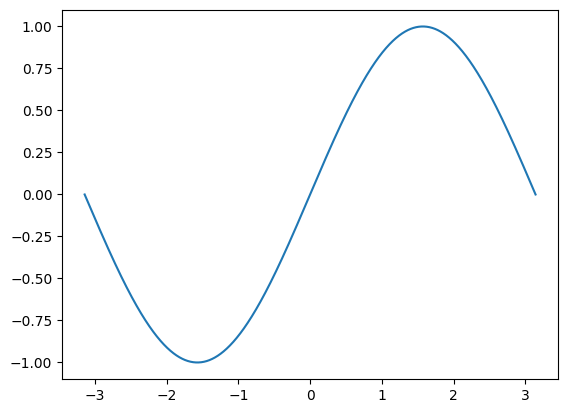

In [69]:
# Ejemplo, crea datos para y = sin(x)

import math
import numpy as np

x = np.linspace(-math.pi, math.pi, 2000, dtype=np.float32)
y = np.sin(x, dtype=np.float32)

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x,y)

In [70]:
# convertir tensores numpy a pytorch: torch.from_numpy()
# convertir datos torch a numpy: X.cpu().numpy()
# enviar datos a la GPU: X.to(device)

import torch
device = set_device()

X = torch.from_numpy(x) # convierte a torch
Y = torch.from_numpy(y)

print(Y)
print(Y.device)

Y = Y.to(device) # envía a GPU
print(Y.device)

Using cpu device
tensor([ 8.7423e-08, -3.1432e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1432e-03, -8.7423e-08])
cpu
cpu


In [71]:
def train (X, Y, model, loss_fn, optimizer, epochs=1000, device='cpu', trace=100): # train sin batches
    size = len(X)
    model = model.to(device)
    model.train() # indica que vamos a entrenar
    Xg, Yg = X.to(device), Y.to(device)
    for e in range(epochs): # bucle de entrenamiento
        optimizer.zero_grad() # reset gradients

        pred = model(Xg) # propagate
        loss = loss_fn(pred, Yg) # prediction error

        loss.backward() # back propagation
        optimizer.step() # update parameters

        if (e+1) % trace == 0: # traces
            loss, current = loss.item(), e+1
            print(f"loss: {loss:>7f}  [{current:>5d} /{epochs:>5d}]")

In [72]:
# modelo para aprender la función seno

model = basic_MLP(1, 500, 1)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

train(X, Y, model, loss_fn, optimizer, 1000, device=device, trace=100)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x2000 and 1x500)